# Final Project

## Dataset : Music & Mental Health Survey Results

------------------------------------------------------------------------------------------------------
The dataset was extracted in kaggle, and the data collection was managed by Catherine Rasgaitis, through a form with generic questions regarding musical background and listening habits and mental health symptoms.

Columns:
- Timestamp - Date and time when form was submitted
- Age - Respondent's age 
- Primary streaming service - Respondent's primary streaming service
- Hours per day - Number of hours the respondent listens to music per day
- While working - Does the respondent listen to music while 
- Instrumentalist - Does the respondent play an instrument regularly?
- Composer - Does the respondent compose music?
- Fav genre - Respondent's favorite or top genre
- Exploratory - Does the respondent actively explore new artists/genres?
- Foreign languages - Does the respondent regularly listen to music with lyrics in a language they are not fluent in?
- BPM - Beats per minute of favorite genre
- Frequency [Classical] - How frequently the respondent listens to classical music
- Frequency [Country] - How frequently the respondent listens to country music
- Frequency [EDM] - How frequently the respondent listens to EDM music
- Frequency [Folk] - How frequently the respondent listens to folks music
- Frequency [Gospel] - How frequently the respondent listens to Gospel music
- Frequency [Hip hop] - How frequently the respondent listens to hip hop music
- Frequency [Jazz] - How frequently the respondent listens to jazz music
- Frequency [K pop] - How frequently the respondent listens to K pop music
- Frequency [Latin] - How frequently the respondent listens to Latin music
- Frequency [Lofi] - How frequently the respondent listens to lofi music
- Frequency [Metal] - How frequently the respondent listens to metal music
- Frequency [Pop] - How frequently the respondent listens to pop music
- Frequency [R&B] - How frequently the respondent listens to R&B music
- Frequency [Rap] - How frequently the respondent listens to rap music
- Frequency [Rock] - How frequently the respondent listens to rock music
- Frequency [Video game music] - How frequently the respondent listens to video game music
- Anxiety - Self-reported anxiety, on a scale of 0-10
- Depression - Self-reported depression, on a scale of 0-10
- Insomnia - Self-reported insomnia, on a scale of 0-10
- OCD - Self-reported OCD, on a scale of 0-10
- Music effects - Does music improve/worsen respondent's mental health conditions?
- Permissions - Permissions to publicize data

kaggle link: https://www.kaggle.com/datasets/catherinerasgaitis/mxmh-survey-results

-----------------------------------------------------------------------------------------------------

## Objective

--------------------------------------------------------------------------------------------------------
The goal here is to identify correlations between a person's music taste or relationship with music and its mental health. And additionaly to predict if an individuals music preference can influence their mental health status.

-------------------------------------------------------------------------------------------------------

## Confirmatory Data Analysis (CDA)

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np

In [2]:
# Loading the cleaned 'Music & Mental Health Survey Results' dataset
df = pd.read_csv('archive\survey_results_cleaned.csv', encoding="latin1", sep= ",")
df.head()

,age,primary_streaming_service,hours_per_day,while_working,instrumentalist,composer,fav_genre,exploratory,foreign_languages,bpm,...,freq_pop,freq_r&b,freq_rap,freq_rock,freq_video_game_music,anxiety,depression,insomnia,ocd,music_effects
0,18,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,156.0,...,Very frequently,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,No effect
1,63,Pandora,1.5,Yes,No,No,Rock,Yes,No,119.0,...,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,No effect
2,18,Spotify,4.0,No,No,No,Video game music,No,Yes,132.0,...,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect
3,61,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,84.0,...,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve
4,18,Spotify,4.0,Yes,No,No,R&B,Yes,No,107.0,...,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve


### 1. Hypothesis Testing

---------------------------------------------------------------------------------------------------------------------------------------------------
Let's perform a Analysis of Variance (ANOVA) to compare the means of the 4 mental health issues in question across various different music genres (using column fav_genre).

---------------------------------------------------------------------------------------------------------------------------------------------------

###### Depression

In [3]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Assuming a significant ANOVA result, conducting post hoc analysis
post_hoc = pairwise_tukeyhsd(endog=df['depression'], groups=df['fav_genre'], alpha=0.05)

print(post_hoc)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
  group1       group2      meandiff p-adj   lower   upper  reject
-----------------------------------------------------------------
Classical          Country   0.2445    1.0 -2.2593  2.7484  False
Classical              EDM   1.1678 0.9102  -1.043  3.3786  False
Classical             Folk   0.9912 0.9877 -1.3666   3.349  False
Classical           Gospel  -1.4088 0.9994 -5.8539  3.0363  False
Classical          Hip hop   1.8069 0.3073 -0.4606  4.0744  False
Classical             Jazz   0.4245    1.0 -2.2836  3.1327  False
Classical            K pop   0.3476    1.0 -2.1233  2.8185  False
Classical            Latin  -1.0755    1.0 -7.1999  5.0489  False
Classical             Lofi   2.5245 0.5181 -1.0334  6.0825  False
Classical            Metal   0.9927 0.8745 -0.8016   2.787  False
Classical              Pop   0.4114    1.0 -1.3043   2.127  False
Classical              R&B  -0.2469    1.0 -2.4946  2.0008  False
Classical 

-------------------------------------------------------------------------------------------------------------------------
For all music genre combinatios, the null cannot be rejected. Meaning, for example:
- Given a p-adj value of 1.0 and a reject value of False, we would conclude that there's no statistically significant difference in the mean value of the measured variable (depression) between individuals who prefer Classical music and those who prefer Country music based on this test. The wide confidence interval that includes both positive and negative values further underscores the uncertainty around this meandiff estimate, suggesting that any observed difference could be due to chance.

- In summary, this particular comparison does not provide evidence to support a difference in means between the Classical and Country groups for the variable in question under the conditions of this study.

------------------------------------------------------------------------------------------------------------------------

###### Anxiety

In [4]:
# Assuming a significant ANOVA result, conducting post hoc analysis
post_hoc = pairwise_tukeyhsd(endog=df['anxiety'], groups=df['fav_genre'], alpha=0.05)

print(post_hoc)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
  group1       group2      meandiff p-adj   lower  upper  reject
----------------------------------------------------------------
Classical          Country   0.5132    1.0 -1.8109 2.8373  False
Classical              EDM   0.5997 0.9998 -1.4524 2.6518  False
Classical             Folk   1.6799 0.3729 -0.5087 3.8684  False
Classical           Gospel  -0.0535    1.0 -4.1794 4.0725  False
Classical          Hip hop   1.2309 0.8188 -0.8739 3.3356  False
Classical             Jazz   1.0132 0.9919 -1.5005  3.527  False
Classical            K pop    1.344 0.8165 -0.9495 3.6375  False
Classical            Latin  -0.5535    1.0 -6.2382 5.1312  False
Classical             Lofi   1.2132  0.997 -2.0893 4.5157  False
Classical            Metal   0.8746  0.914 -0.7909 2.5401  False
Classical              Pop   1.1878 0.4255 -0.4047 2.7803  False
Classical              R&B   0.2846    1.0 -1.8017  2.371  False
Classical              Ra

-------------------------------------------------------------------------------------------------------------------
Again, we cannot reject the null hypothesis for any of the above combinations.

Thereby, there is no evidence to support that a difference of means of anxiety scores for each two different music genre combination.

--------------------------------------------------------------------------------------------------------------------
    

###### Insomnia

In [5]:
# Assuming a significant ANOVA result, conducting post hoc analysis
post_hoc = pairwise_tukeyhsd(endog=df['insomnia'], groups=df['fav_genre'], alpha=0.05)

print(post_hoc)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
  group1       group2      meandiff p-adj   lower  upper  reject
----------------------------------------------------------------
Classical          Country  -1.0725 0.9881 -3.6326 1.4877  False
Classical              EDM   0.1805    1.0   -2.08  2.441  False
Classical             Folk  -0.1591    1.0 -2.5699 2.2517  False
Classical           Gospel   1.5409 0.9988 -3.0041 6.0859  False
Classical          Hip hop  -0.3219    1.0 -2.6403 1.9966  False
Classical             Jazz   0.0575    1.0 -2.7115 2.8266  False
Classical            K pop  -0.3309    1.0 -2.8574 2.1955  False
Classical            Latin  -0.4591    1.0 -6.7211 5.8029  False
Classical             Lofi   1.8075 0.9444 -1.8304 5.4455  False
Classical            Metal   0.7644 0.9887 -1.0703  2.599  False
Classical              Pop   -0.424    1.0 -2.1783 1.3302  False
Classical              R&B  -0.9067 0.9935 -3.2049 1.3915  False
Classical              Ra

-------------------------------------------------------------------------------------------------------------------
Again, we cannot reject the null hypothesis for any of the above combinations.

Thereby, there is no evidence to support that a difference of means of insomnia scores for each two different music genre combination.

--------------------------------------------------------------------------------------------------------------------

###### OCD

In [6]:
# Assuming a significant ANOVA result, conducting post hoc analysis
post_hoc = pairwise_tukeyhsd(endog=df['ocd'], groups=df['fav_genre'], alpha=0.05)

print(post_hoc)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
  group1       group2      meandiff p-adj   lower  upper  reject
----------------------------------------------------------------
Classical          Country   0.3826    1.0 -1.9952 2.7604  False
Classical              EDM   0.6226 0.9997 -1.4769 2.7222  False
Classical             Folk  -0.1774    1.0 -2.4165 2.0618  False
Classical           Gospel   -2.044 0.9551 -6.2653 2.1773  False
Classical          Hip hop   0.2109    1.0 -1.9425 2.3642  False
Classical             Jazz   0.4226    1.0 -2.1492 2.9945  False
Classical            K pop   0.1611    1.0 -2.1854 2.5076  False
Classical            Latin  -0.7107    1.0 -6.5268 5.1054  False
Classical             Lofi   1.0226 0.9997 -2.3562 4.4015  False
Classical            Metal   0.0204    1.0 -1.6836 1.7244  False
Classical              Pop   0.4779 0.9998 -1.1514 2.1072  False
Classical              R&B   0.3655    1.0  -1.769    2.5  False
Classical              Ra

-------------------------------------------------------------------------------------------------------------------
Again, we cannot reject the null hypothesis for any of the above combinations.

Thereby, there is no evidence to support that a difference of means of OCD scores for each two different music genre combination.

--------------------------------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------
Let's perform a Analysis of Variance (ANOVA) to compare the means of the 4 mental health issues in question and being an Instrumentalist or not.

---------------------------------------------------------------------------------------------------------

###### Anxiety

In [7]:
from scipy import stats

group1 = df[df['instrumentalist'] == 'Yes']['anxiety']
group2 = df[df['instrumentalist'] == 'No']['anxiety']

t_statistic, p_value = stats.ttest_ind(group1, group2)

print(f"T-Statistic: {t_statistic}")
print(f"P-value: {p_value}")

T-Statistic: 0.7692097849923946
P-value: 0.442016567125757


-----------------------------------------------------------------------------------------------------------------------------------------
Given the T-Statistic and P-value:

- The difference in anxiety scores between instrumentalists and non-instrumentalists is not statistically significant. This implies that being an instrumentalist, based on this analysis, does not significantly affect anxiety scores – at least not in a manner detectable by this test in our specific dataset.
- The high p-value suggests that there is a high likelihood of observing our results, or more extreme, purely by chance if there were actually no difference in anxiety levels between the two groups in the overall population.

---------------------------------------------------------------------------------------------------------------------

###### Depression

In [8]:
group1 = df[df['instrumentalist'] == 'Yes']['depression']
group2 = df[df['instrumentalist'] == 'No']['depression']

t_statistic, p_value = stats.ttest_ind(group1, group2)

print(f"T-Statistic: {t_statistic}")
print(f"P-value: {p_value}")

T-Statistic: 0.1517979791440699
P-value: 0.8793880453335483


-----------------------------------------------------------------------------------------------------------------------------------------
Given the T-Statistic and P-value:

- The difference in depression scores between instrumentalists and non-instrumentalists is not statistically significant. This implies that being an instrumentalist, based on this analysis, does not significantly affect depression scores – at least not in a manner detectable by this test in our specific dataset.
- The high p-value suggests that there is a high likelihood of observing our results, or more extreme, purely by chance if there were actually no difference in depression levels between the two groups in the overall population.

---------------------------------------------------------------------------------------------------------------------

###### Insomnia

In [9]:
group1 = df[df['instrumentalist'] == 'Yes']['insomnia']
group2 = df[df['instrumentalist'] == 'No']['insomnia']

t_statistic, p_value = stats.ttest_ind(group1, group2)

print(f"T-Statistic: {t_statistic}")
print(f"P-value: {p_value}")

T-Statistic: 0.6756564760206442
P-value: 0.49947187205132126


-------------------------------------------------------------------------------------------
The same thing referred for anxiety and depression scroes applies to the insomnia scores: being an instrumentalist, based on this analysis, does not significantly affect insomnia scores

-----------------------------------------------------------------------------------------------------------------------

###### OCD

In [10]:
group1 = df[df['instrumentalist'] == 'Yes']['ocd']
group2 = df[df['instrumentalist'] == 'No']['ocd']

t_statistic, p_value = stats.ttest_ind(group1, group2)

print(f"T-Statistic: {t_statistic}")
print(f"P-value: {p_value}")

T-Statistic: 0.42166026218560315
P-value: 0.673396640959381


--------------------------------------
Again, given the results, this implies that being an instrumentalist, based on this analysis, does not significantly affect OCD scores.


---------------------------------------------------------------------------------------


### 2. Regression Analysis

##### 2.1 Linear Regression

---------------------------------------------------------------------------------------------------------------------------------------------------------------------
We'll be using Linear Regression to predict a continuous mental health score (depression, anxiety, insomnia and OCD) from various music preferences or genres (fav_genre)

----------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [11]:
# One-hot encode 'fav_genre'
df_encoded = pd.get_dummies(df, columns=['fav_genre'], drop_first=True)

df_encoded.head()

,age,primary_streaming_service,hours_per_day,while_working,instrumentalist,composer,exploratory,foreign_languages,bpm,freq_classical,...,fav_genre_Jazz,fav_genre_K pop,fav_genre_Latin,fav_genre_Lofi,fav_genre_Metal,fav_genre_Pop,fav_genre_R&B,fav_genre_Rap,fav_genre_Rock,fav_genre_Video game music
0,18,Spotify,3.0,Yes,Yes,Yes,Yes,Yes,156.0,Rarely,...,False,False,True,False,False,False,False,False,False,False
1,63,Pandora,1.5,Yes,No,No,Yes,No,119.0,Sometimes,...,False,False,False,False,False,False,False,False,True,False
2,18,Spotify,4.0,No,No,No,No,Yes,132.0,Never,...,False,False,False,False,False,False,False,False,False,True
3,61,YouTube Music,2.5,Yes,No,Yes,Yes,Yes,84.0,Sometimes,...,True,False,False,False,False,False,False,False,False,False
4,18,Spotify,4.0,Yes,No,No,Yes,No,107.0,Never,...,False,False,False,False,False,False,True,False,False,False


In [12]:
# Step 1: Drop specific target columns to create a temporary DataFrame that still holds potential categorical columns
temp_features = df_encoded.drop(['depression', 'anxiety', 'insomnia', 'ocd'], axis=1)

# Step 2: Select only numerical columns from temp_features. This keeps one-hot encoded and numerical while dropping original categoricals.
X = temp_features.select_dtypes(include=['number'])


###### Depression

In [13]:
# Extracting the target variable remains the same
y = df_encoded['depression']

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r_squared}")

Mean Squared Error: 8.178151044602116
R-squared: 0.021786164854450507


---------------------------------------------------------------------------------------------------------------------------------------
- A MSE of 8.178 indicates that, on average, the square of the difference between observed and predicted values in our model is 8.178. The smaller the MSE, the closer your model's predictions are to the actual values, indicating a better fit.

-  An R² value of approximately 0.022 suggests that about 2.2% of the variance in our dependent variable (depression) can be explained by our model. Given that R² ranges from 0 to 1, where 1 indicates a perfect fit, a value as low as 0.022 implies that our model does not explain much of the variance in the target variable, suggesting that the model has a weak predictive capability in its current form.

----------------------------------------------------------------------------------------------------------------------------------------

###### Anxiety

In [15]:
# Extracting the target variable remains the same
y = df_encoded['anxiety']

In [16]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r_squared}")

Mean Squared Error: 7.939347897082469
R-squared: -0.06517183307342767


-------------------------------------------------------------------------------------------
Again we didn't get good results, which means that our model has a weak predictive capability for anxiety scores too.

-------------------------------------------------------------------------------------------

###### Insomnia

In [17]:
# Extracting the target variable remains the same
y = df_encoded['insomnia']

In [18]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r_squared}")

Mean Squared Error: 8.559411075668894
R-squared: -0.03982433842654376


-------------------------------------------------------------------------------------------
Again we didn't get good results, which means that our model has a weak predictive capability for insomnia scores too.

-------------------------------------------------------------------------------------------

###### OCD

In [19]:
# Extracting the target variable remains the same
y = df_encoded['ocd']

In [20]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r_squared}")

Mean Squared Error: 9.812996882211493
R-squared: -0.005755907462017484


-------------------------------------------------------------------------------------------
Again we didn't get good results, which means that our model has a weak predictive capability for OCD scores too.

-------------------------------------------------------------------------------------------

##### 2.2 Logistic Regression

----------------------------------------------------------------------------------------------------------------------------------------------------------------------
We'll be performing Logistic Regression to  reveal how changes in the frequency of listening to specific music genres (encoded numerically) influence the odds of having high levels of depression or anxiety, for example.

----------------------------------------------------------------------------------------------------------------------------------------------------------

In [21]:
# Loading the encoded frequency columns from 'Music & Mental Health Survey Results' dataset
df_freq_encoded = pd.read_csv(r'C:\Users\mafal\Documents\ironhack\projects\project-music-and-mental-health-survey\archive\freq_col_encoded.csv', encoding="latin1", sep= ",")
df_freq_encoded.head()

,freq_classical_encoded,freq_country_encoded,freq_edm_encoded,freq_folk_encoded,freq_gospel_encoded,freq_hip_hop_encoded,freq_jazz_encoded,freq_k_pop_encoded,freq_latin_encoded,freq_lofi_encoded,freq_metal_encoded,freq_pop_encoded,freq_r&b_encoded,freq_rap_encoded,freq_rock_encoded,freq_video_game_music_encoded,anxiety,depression,insomnia,ocd
0,3,1,3,1,1,2,1,4,4,3,1,4,2,4,1,2,3.0,0.0,1.0,0.0
1,2,1,1,3,2,3,4,3,2,3,1,2,2,3,4,3,7.0,2.0,2.0,1.0
2,1,1,4,1,1,3,3,4,1,2,2,3,1,3,3,4,7.0,7.0,10.0,2.0
3,2,1,1,3,2,1,4,2,4,2,1,2,2,1,1,1,9.0,7.0,3.0,3.0
4,1,1,3,1,3,4,1,4,2,2,1,2,4,4,1,3,7.0,2.0,5.0,9.0


###### Depression

In [22]:
# Example of binning the 'depression' scores into low (0-3), medium (4-6), and high (7-10) 
df_freq_encoded['depression_category'] = pd.cut(df_freq_encoded['depression'], bins=[-np.inf, 3, 6, np.inf], labels=['Low', 'Medium', 'High'])

# Use get_dummies to encode these categories if applying Logistic Regression
df_freq_encoded = pd.get_dummies(df_freq_encoded, columns=['depression_category'], drop_first=True)

In [23]:
df_freq_encoded

,freq_classical_encoded,freq_country_encoded,freq_edm_encoded,freq_folk_encoded,freq_gospel_encoded,freq_hip_hop_encoded,freq_jazz_encoded,freq_k_pop_encoded,freq_latin_encoded,freq_lofi_encoded,...,freq_r&b_encoded,freq_rap_encoded,freq_rock_encoded,freq_video_game_music_encoded,anxiety,depression,insomnia,ocd,depression_category_Medium,depression_category_High
0,3,1,3,1,1,2,1,4,4,3,...,2,4,1,2,3.0,0.0,1.0,0.0,False,False
1,2,1,1,3,2,3,4,3,2,3,...,2,3,4,3,7.0,2.0,2.0,1.0,False,False
2,1,1,4,1,1,3,3,4,1,2,...,1,3,3,4,7.0,7.0,10.0,2.0,False,True
3,2,1,1,3,2,1,4,2,4,2,...,2,1,1,1,9.0,7.0,3.0,3.0,False,True
4,1,1,3,1,3,4,1,4,2,2,...,4,4,1,3,7.0,2.0,5.0,9.0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730,4,3,1,2,1,2,3,1,2,3,...,1,3,4,1,7.0,6.0,0.0,9.0,True,False
731,3,3,1,1,1,1,3,1,1,3,...,1,1,2,2,3.0,2.0,2.0,5.0,False,False
732,3,2,2,3,3,4,3,3,3,2,...,2,2,3,3,2.0,2.0,2.0,2.0,False,False
733,4,1,1,1,1,1,3,1,1,1,...,1,1,1,2,2.0,3.0,2.0,1.0,False,False


In [24]:
# X contains the predictors, which include the freq columns
# Assuming all freq columns are prefixed with 'freq_', and are already suitable for analysis
X = df_freq_encoded[[col for col in df_freq_encoded.columns if col.startswith('freq_')]]

# y contains the binary encoded depression outcome
y = df_freq_encoded['depression_category_Medium']  # Assuming this is your binary encoded depression column

In [25]:
from sklearn.model_selection import train_test_split

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Initialize the logistic regression model
model = LogisticRegression(max_iter=1000)  # Adjust max_iter as necessary for convergence

# Fit the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

In [27]:
# Basic evaluation using accuracy and a confusion matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6938775510204082
Confusion Matrix:
 [[102   1]
 [ 44   0]]


----------------------------------------------------------------------------------------
- An accuracy of approximately 0.694 means that around 69.4% of your model's predictions are correct. While this might seem decent at a glance, accuracy alone can sometimes be misleading, especially if the class distribution is imbalanced. Relying solely on accuracy might not capture the model's performance nuances.

- About the Confusion Matrix:
    - True Negatives (TN): Thetop-leftsquare (102) represents the number of correctly predicted negative class labels (e.g., not depressed).
    - False Positives (FP): The top-right square (1) shows the number of negative class labels incorrectly predicted as positive (e.g., predicted as depressed when they are not).
    - False Negatives (FN): The bottom-left square (44) shows the number of positive class labels incorrectly predicted as negative (e.g., predicted as not depressed when they are).
    - True Positives (TP): The bottom-rightsquare (0) represents the number of correctly predicted positive class labels (e.g., depressed).

Further Insights from the Confusion Matrix:
- High FN with Zero TP: Your model didn't correctly identify any of the positive cases ('depressed'), as indicated by the 0 in the TP section of the matrix. All positive cases were misclassified as negatives, which is concerning for predictive tasks aiming to identify positive cases.

- Imbalanced Data Suspected: The model seems biased toward predicting the majority class (assuming non-depressed cases are more prevalent, given the high TN), a common issue in imbalanced datasets.

------------------------------------------------------------------------------------------------------------------------

In [28]:
# y contains the binary encoded depression outcome
y = df_freq_encoded['depression_category_High'] 

In [29]:
# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Initialize the logistic regression model
model = LogisticRegression(max_iter=1000)  # Adjust max_iter as necessary for convergence

# Fit the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

In [31]:
# Basic evaluation using accuracy and a confusion matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6190476190476191
Confusion Matrix:
 [[85 11]
 [45  6]]


-------------------------------------------------------------------------
- True Negatives (TN): 85 - The count of negative instances (e.g., Non-Depressed) correctly predicted by the model.
- False Positives (FP): 11 - The count of negative instances incorrectly predicted as positive (e.g., Non-Depressed incorrectly identified as Depressed).
- False Negatives (FN): 45 - The count of positive instances (e.g., Depressed) incorrectly predicted as negative by the model.
- True Positives (TP): 6 - The count of positive instances correctly predicted by the model.

Evaluation:

- Imbalance Impact: The significantly greater number of False Negatives (45) compared to True Positives (6) suggests that the model struggles with identifying positive instances, which may indicate the model is biased towards predicting the negative class, possibly due to class imbalance.

- Accuracy Limitation: Despite the accuracy being over 61%, the breakdown in the confusion matrix highlights the model's limitations, especially in detecting the positive class effectively.

------------------------------------------------------------------------

###### Anxiety

In [32]:
# Example of binning the 'anxiety' scores into low (0-3), medium (4-6), and high (7-10) 
df_freq_encoded['anxiety_category'] = pd.cut(df_freq_encoded['anxiety'], bins=[-np.inf, 3, 6, np.inf], labels=['Low', 'Medium', 'High'])

# Use get_dummies to encode these categories if applying Logistic Regression
df_freq_encoded = pd.get_dummies(df_freq_encoded, columns=['anxiety_category'], drop_first=True)

In [33]:
# X contains the predictors, which include the freq columns
# Assuming all freq columns are prefixed with 'freq_', and are already suitable for analysis
X = df_freq_encoded[[col for col in df_freq_encoded.columns if col.startswith('freq_')]]

# y contains the binary encoded anxiety outcome
y = df_freq_encoded['anxiety_category_Medium']  # Assuming this is your binary encoded anxiety column

In [34]:
# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Initialize the logistic regression model
model = LogisticRegression(max_iter=1000)  # Adjust max_iter as necessary for convergence

# Fit the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

In [36]:
# Basic evaluation using accuracy and a confusion matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6938775510204082
Confusion Matrix:
 [[102   1]
 [ 44   0]]


---------------------------------------------------------------------
Again the model's failure to correctly identify any positive cases is particularly concerning if the positive class is critical to the task (e.g., identifying individuals with anxiety).

-------------------------------------------------------------------------------------

In [37]:
# y contains the binary encoded anxiety outcome
y = df_freq_encoded['anxiety_category_High']  # Assuming this is your binary encoded anxiety column

In [38]:
# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# Initialize the logistic regression model
model = LogisticRegression(max_iter=1000)  # Adjust max_iter as necessary for convergence

# Fit the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

In [40]:
# Basic evaluation using accuracy and a confusion matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.5986394557823129
Confusion Matrix:
 [[47 22]
 [37 41]]


--------------------------------------------
The confusion matrix is arranged as:

- Top-Left (True Negatives, TN): 47 - The model correctly predicted the negative class this many times.
- Top-Right (False Positives, FP): 22 - The model incorrectly predicted these cases as positive when they were actually negative.
- Bottom-Left (False Negatives, FN): 37 - The model incorrectly predicted these cases as negative when they were actually positive.
- Bottom-Right (True Positives, TP): 41 - The model correctly predicted the positive class this many times.

---------------------------------------------------------------------------

###### Insomnia

In [41]:
# Example of binning the 'insomnia' scores into low (0-3), medium (4-6), and high (7-10) 
df_freq_encoded['insomnia_category'] = pd.cut(df_freq_encoded['insomnia'], bins=[-np.inf, 3, 6, np.inf], labels=['Low', 'Medium', 'High'])

# Use get_dummies to encode these categories if applying Logistic Regression
df_freq_encoded = pd.get_dummies(df_freq_encoded, columns=['insomnia_category'], drop_first=True)

In [42]:
# X contains the predictors, which include the freq columns
# Assuming all freq columns are prefixed with 'freq_', and are already suitable for analysis
X = df_freq_encoded[[col for col in df_freq_encoded.columns if col.startswith('freq_')]]

# y contains the binary encoded insomnia outcome
y = df_freq_encoded['insomnia_category_Medium']  # Assuming this is your binary encoded insomnia column

In [43]:
# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
# Initialize the logistic regression model
model = LogisticRegression(max_iter=1000)  # Adjust max_iter as necessary for convergence

# Fit the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

In [45]:
# Basic evaluation using accuracy and a confusion matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7142857142857143
Confusion Matrix:
 [[105   0]
 [ 42   0]]


In [46]:
# y contains the binary encoded insomnia outcome
y = df_freq_encoded['insomnia_category_High']  # Assuming this is your binary encoded insomnia column

In [47]:
# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
# Initialize the logistic regression model
model = LogisticRegression(max_iter=1000)  # Adjust max_iter as necessary for convergence

# Fit the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

In [49]:
# Basic evaluation using accuracy and a confusion matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8027210884353742
Confusion Matrix:
 [[118   1]
 [ 28   0]]


---------------------------------------------------------------------
Again the model's failure to correctly identify any positive cases is particularly concerning if the positive class is critical to the task (e.g., identifying individuals with insomnia).

-------------------------------------------------------------------------------------

###### OCD

In [50]:
# Example of binning the 'ocd' scores into low (0-3), medium (4-6), and high (7-10) 
df_freq_encoded['ocd_category'] = pd.cut(df_freq_encoded['ocd'], bins=[-np.inf, 3, 6, np.inf], labels=['Low', 'Medium', 'High'])

# Use get_dummies to encode these categories if applying Logistic Regression
df_freq_encoded = pd.get_dummies(df_freq_encoded, columns=['ocd_category'], drop_first=True)

In [51]:
# X contains the predictors, which include the freq columns
# Assuming all freq columns are prefixed with 'freq_', and are already suitable for analysis
X = df_freq_encoded[[col for col in df_freq_encoded.columns if col.startswith('freq_')]]

# y contains the binary encoded ocd outcome
y = df_freq_encoded['ocd_category_Medium']  # Assuming this is your binary encoded ocd column

In [52]:
# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
# Initialize the logistic regression model
model = LogisticRegression(max_iter=1000)  # Adjust max_iter as necessary for convergence

# Fit the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

In [54]:
# Basic evaluation using accuracy and a confusion matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8231292517006803
Confusion Matrix:
 [[121   0]
 [ 26   0]]


In [55]:
# y contains the binary encoded ocd outcome
y = df_freq_encoded['ocd_category_High']  # Assuming this is your binary encoded ocd column

In [56]:
# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
# Initialize the logistic regression model
model = LogisticRegression(max_iter=1000)  # Adjust max_iter as necessary for convergence

# Fit the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

In [58]:
# Basic evaluation using accuracy and a confusion matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8163265306122449
Confusion Matrix:
 [[120   0]
 [ 27   0]]


---------------------------------------------------------------------
Again the model's failure to correctly identify any positive cases is particularly concerning if the positive class is critical to the task (e.g., identifying individuals with ocd).

-------------------------------------------------------------------------------------

-------------------------------------------------------------------------------
Since we got good results when testing the correlation between Instrumentalist and Music Effects during EDA, we'll be performing ordinal Logistic Regression to check how being an instrumentalist might be associated with different levels of music effects: No effects, improv and worsen.

-----------------------------------

In [78]:
df_copy = df.copy()

In [79]:
# Encoding the 'instrumentalist' binary variable
df_copy['instrumentalist_encoded'] = df_copy['instrumentalist'].map({'Yes': 1, 'No': 0})

# # Encoding the 'music-effects' ordinal variable
df_copy['music_effects_encoded'] = df_copy['music_effects'].map({'No effect': 0, 'Improve': 1, 'Worsen': 2})

# Encoding the 'composer' binary variable
df_copy['composer_encoded'] = df_copy['composer'].map({'Yes': 1, 'No': 0})

# Encoding the 'exploratory' binary variable
df_copy['exploratory_encoded'] = df_copy['exploratory'].map({'Yes': 1, 'No': 0})

In [80]:
!pip install mord

In [81]:
import mord as m
from sklearn.model_selection import train_test_split

# Adjusting X to include additional predictors
X = df_copy[['instrumentalist_encoded', 'composer_encoded', 'exploratory_encoded']]
y = df_copy['music_effects_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Using the LogisticAT model as an example (Logistic Regression for All Thresholds)
model = m.LogisticAT(alpha=1.0)  # Alpha is the regularization parameter
model.fit(X_train, y_train)

# Predictions can be made on the test set, and model performance evaluated
y_pred = model.predict(X_test)

In [82]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7755102040816326


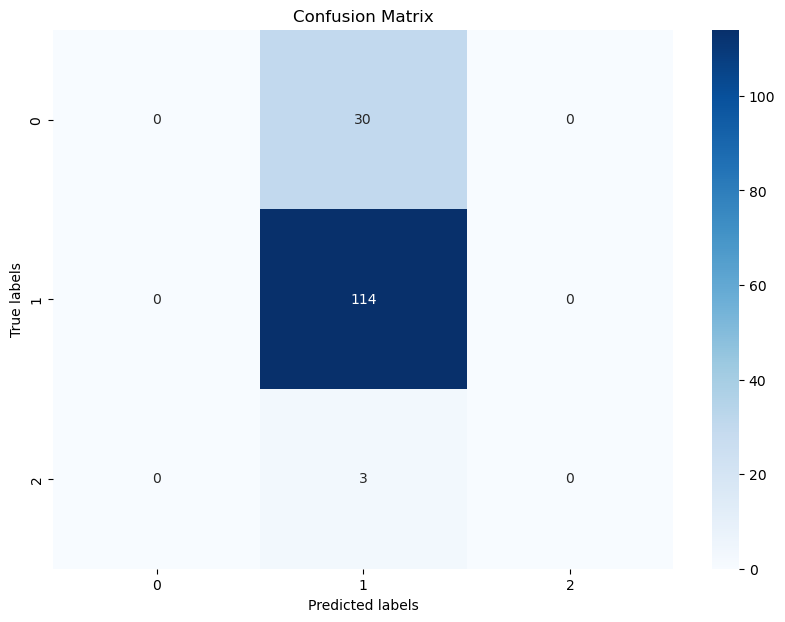

In [83]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [84]:
from sklearn.metrics import classification_report

cls_report = classification_report(y_test, y_pred)
print(cls_report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.78      1.00      0.87       114
           2       0.00      0.00      0.00         3

    accuracy                           0.78       147
   macro avg       0.26      0.33      0.29       147
weighted avg       0.60      0.78      0.68       147



c:\Users\mafal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mafal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mafal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [85]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 0.22448979591836735


In [86]:
# Examining incorrect predictions
df_errors = df_copy.loc[y_test.index]  # Use the original df to retain unencoded data
df_errors['Predicted'] = y_pred
incorrect_predictions = df_errors[df_errors['music_effects_encoded'] != df_errors['Predicted']]

print("Sample of Incorrect Predictions:\n", incorrect_predictions.head())

Sample of Incorrect Predictions:
      age primary_streaming_service  hours_per_day while_working  \
33    16                   Spotify            1.0           Yes   
174   18                   Spotify            2.0           Yes   
247   20                   Spotify            2.0            No   
65    24                   Spotify            3.0            No   
81    22                   Spotify            2.0           Yes   

    instrumentalist composer  fav_genre exploratory foreign_languages    bpm  \
33               No       No  Classical          No                No   75.0   
174              No       No        R&B          No               Yes  164.0   
247             Yes      Yes      Metal          No               Yes  220.0   
65               No       No       Rock         Yes               Yes  130.0   
81               No       No      K pop         Yes               Yes  126.0   

     ... anxiety depression insomnia  ocd music_effects  \
33   ...     0.0       

In [87]:
incorrect_predictions.head()

,age,primary_streaming_service,hours_per_day,while_working,instrumentalist,composer,fav_genre,exploratory,foreign_languages,bpm,...,anxiety,depression,insomnia,ocd,music_effects,instrumentalist_encoded,music_effects_encoded,composer_encoded,exploratory_encoded,Predicted
33,16,Spotify,1.0,Yes,No,No,Classical,No,No,75.0,...,0.0,0.0,0.0,0.0,No effect,0,0,0,0,1
174,18,Spotify,2.0,Yes,No,No,R&B,No,Yes,164.0,...,5.0,6.0,0.0,1.0,No effect,0,0,0,0,1
247,20,Spotify,2.0,No,Yes,Yes,Metal,No,Yes,220.0,...,0.0,0.0,0.0,1.0,No effect,1,0,1,0,1
65,24,Spotify,3.0,No,No,No,Rock,Yes,Yes,130.0,...,0.0,0.0,8.0,0.0,No effect,0,0,0,1,1
81,22,Spotify,2.0,Yes,No,No,K pop,Yes,Yes,126.0,...,7.0,8.0,5.0,1.0,No effect,0,0,0,1,1


In [88]:
# mord doesn't directly expose coefficients easily; however, we can look at its attributes
print(f'Model coefficients: {model.coef_}')

Model coefficients: [0.39054732 0.17929691 0.37025269]


---------------------------------------------------------------------------------
- **Accuracy:** The model correctly predicted 77.55% of the cases. This is a decent accuracy rate, indicating a relatively high level of correctness in predictions versus actual outcomes. However, the significance of this accuracy also depends on the distribution of the classes in our data.

- **Mean Absolute Error:** On average, the predictions made by the model are off by 0.224 units on the scale used to measure the outcome variable (music_effects_encoded). Given that our outcome variable seems to be ordinal (encoded with values representing ordered categories such as No effect, Improve, Worsen), an MAE of 0.224 suggests that the model predictions are quite close to the actual values, with a small average deviation. This is particularly meaningful in ordered categorical outcomes where the distance between categories is considered.

- **Model coefficient:**
    - Instrumentalist (0.39054732): Being an instrumentalist is associated with an increase in the log-odds of reporting a higher category of music effects by approximately 0.391, compared to non-instrumentalists. This suggests a positive relationship between being an instrumentalist and perceiving more beneficial or intense music effects.
    - Composer (0.17929691): Being a composer is associated with an increase in the log-odds of reporting a higher category of music effects by approximately 0.179, compared to non-composers. This indicates a positive but smaller relationship compared to being an instrumentalist, suggesting that being a composer also relates positively to music effects but to a lesser extent.
    - Exploratory (0.37025269): Having an exploratory attitude towards discovering new artists or genres is associated with an increase in the log-odds of reporting a higher category of music effects by approximately 0.370, hinting at a strong positive relationship similar to instrumentalists. This points to the impactful nature of exploratory behaviors in enhancing respondents' experiences or perceptions of music effects.
The positive coefficients across all variables indicate that engagement in music, whether through playing an instrument, composing, or exploring new music, is positively associated with how individuals perceive the effects of music on their mental health or well-being.

- **5 Incorrect Predictions:** Out of 735 test rows, the model made 5 incorrect predictions


The accuracy and MAE together suggest a model that performs relatively well, with predictions usually close to the actual outcomes. The positive model coefficient signifies an association between being an instrumentalist and experiencing more positive music effects.


--------------------------------------------------------------------------------------------------------------------------

### 3. Machine Learning

#### 3.1 Decision Trees

----------------------------------------------------
We'll be using a decision tree to predict levels of music_effects_encoded based on instrumentalist

------------------------------------------------------

In [89]:
df_copy = df.copy()

In [90]:
# Binary encoding
df_copy['instrumentalist_encoded'] = df_copy['instrumentalist'].map({'Yes': 1, 'No': 0})

# Ordinal encoding
df_copy['music_effects_encoded'] = df_copy['music_effects'].map({'No effect': 0, 'Improve': 1, 'Worsen': 2})

# Encoding the 'composer' binary variable
df_copy['composer_encoded'] = df_copy['composer'].map({'Yes': 1, 'No': 0})

# Encoding the 'exploratory' binary variable
df_copy['exploratory_encoded'] = df_copy['exploratory'].map({'Yes': 1, 'No': 0})

In [91]:
X = df_copy[['instrumentalist_encoded', 'composer_encoded', 'exploratory_encoded']]  # Features
y = df_copy['music_effects_encoded']  # Target

In [92]:
df_copy

,age,primary_streaming_service,hours_per_day,while_working,instrumentalist,composer,fav_genre,exploratory,foreign_languages,bpm,...,freq_video_game_music,anxiety,depression,insomnia,ocd,music_effects,instrumentalist_encoded,music_effects_encoded,composer_encoded,exploratory_encoded
0,18,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,156.0,...,Sometimes,3.0,0.0,1.0,0.0,No effect,1,0,1,1
1,63,Pandora,1.5,Yes,No,No,Rock,Yes,No,119.0,...,Rarely,7.0,2.0,2.0,1.0,No effect,0,0,0,1
2,18,Spotify,4.0,No,No,No,Video game music,No,Yes,132.0,...,Very frequently,7.0,7.0,10.0,2.0,No effect,0,0,0,0
3,61,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,84.0,...,Never,9.0,7.0,3.0,3.0,Improve,0,1,1,1
4,18,Spotify,4.0,Yes,No,No,R&B,Yes,No,107.0,...,Rarely,7.0,2.0,5.0,9.0,Improve,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730,17,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,120.0,...,Never,7.0,6.0,0.0,9.0,Improve,1,1,0,1
731,18,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,160.0,...,Sometimes,3.0,2.0,2.0,5.0,Improve,1,1,0,1
732,19,Other,6.0,Yes,No,Yes,Rap,Yes,No,120.0,...,Rarely,2.0,2.0,2.0,2.0,Improve,0,1,1,1
733,19,Spotify,5.0,Yes,Yes,No,Classical,No,No,170.0,...,Sometimes,2.0,3.0,2.0,1.0,Improve,1,1,0,0


In [93]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [94]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Decision Tree Classifier
model = DecisionTreeClassifier(max_depth=3)  # Limit depth for interpretability
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [95]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Evaluating the model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7755102040816326
Confusion Matrix:
 [[  0  30   0]
 [  0 114   0]
 [  0   3   0]]


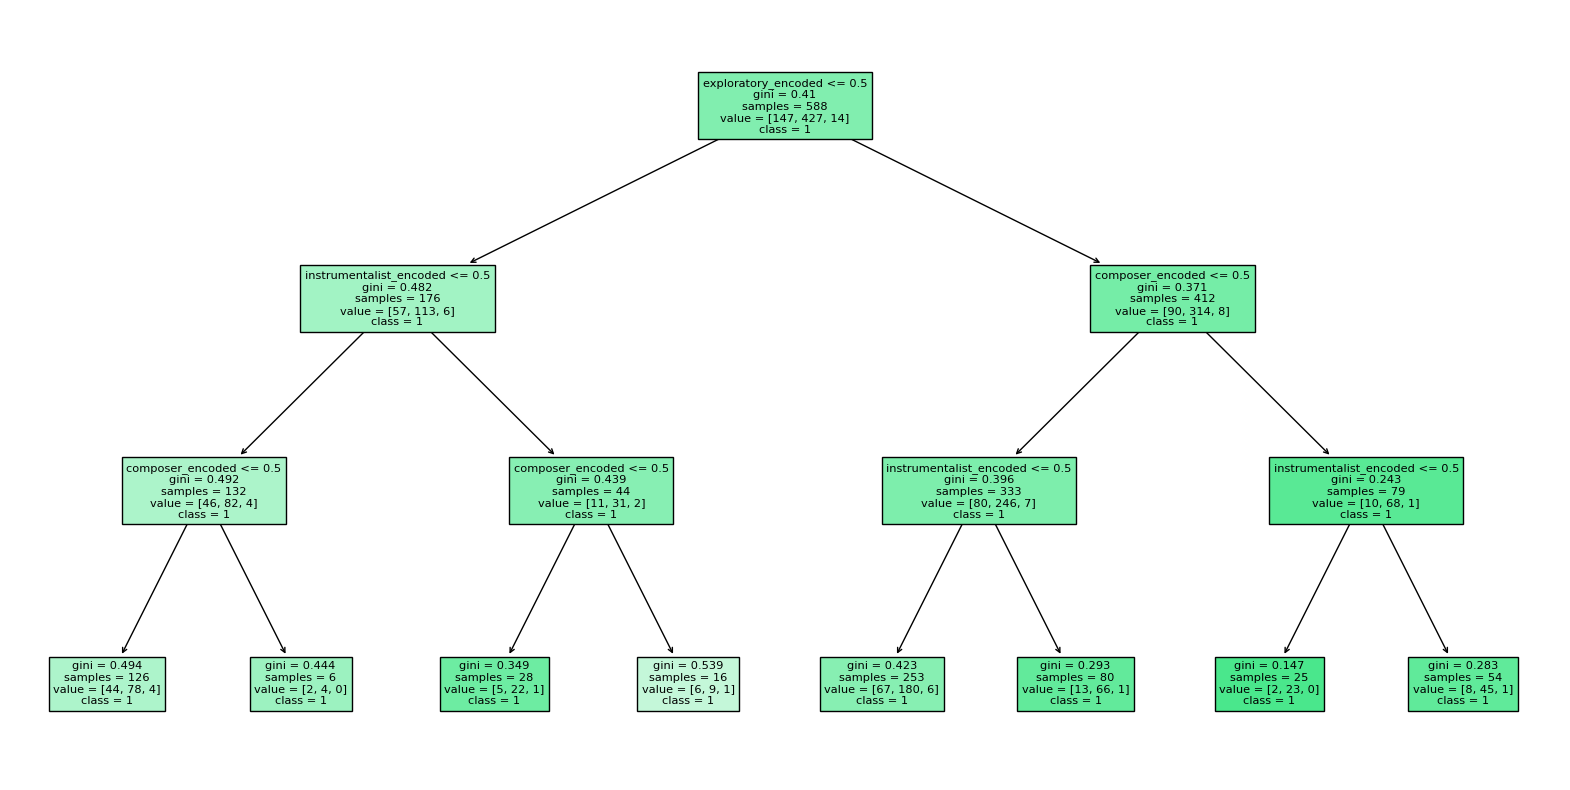

In [96]:
# Visualizing the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=X.columns.tolist(), class_names=model.classes_.astype(str).tolist())  # Convert to list
plt.show()

----------------------------------------------------------
- The results indicate that about 77.55% of the predictions made by the model match the actual data. 

- Confusion Matrix:
    - First and Third Classes (Top/Bottom Row): The model did not correctly predict any instances of the first and third classes (all entries in the first and last rows are zeros except in the second column). All instances of these classes were incorrectly predicted as belonging to the second class.
    - Second Class (Middle Row): The model correctly predicted all instances of the second class (114 true positives), but also incorrectly classified all instances of the other two classes as belonging to this second class.
    - No True Positives for First and Third Classes: The model appears to always predict the second class, regardless of the actual class, evidenced by zeros in the first and last columns of the confusion matrix.

Conclusion:
A single metric like accuracy can be misleading, and the confusion matrix reveals that the model's seemingly high accuracy is due to its propensity to predict only the most frequent class. Improvement strategies could include rebalancing the dataset, exploring different models, or adjusting the decision threshold to better accommodate minority classes.

------------------------------------------------------------------

### Final observations

------------------------------------------------------------------------------------------------
##### 1. **Weak Correlations Between Music Preferences and Mental Health Issues**

- The very weak correlations between favorite music genres, frequency of listening to certain music genres, and mental health issue scores indicate that there isn't a strong linear relationship between these music preferences and mental health conditions as quantified in our dataset. This suggests that, at least linearly and individually, music preferences might not significantly impact mental health scores, or that other unmeasured factors could play a more substantial role.

##### 2. **Association Between Instrument Playing and Music's Effects**

- Finding enough evidence to suggest an association between playing an instrument and the effects music has on mental health marks an important observation. This could imply that active participation in music (e.g., playing an instrument) has a different or more pronounced relationship with how individuals perceive music's impact on their mental well-being compared to passive listening.

##### 3. **Strong correlation between Music exploration and Music's Effects**

- The strong correlation between music exploration and positive mental health effects highlights the potential of musical engagement as a component of mental well-being. It underscores the need for a nuanced approach to music in therapeutic, educational, and entertainment contexts, advocating for deeper exploration into the qualitative aspects of individuals' musical journeys.  For practitioners in mental health and music therapy, these findings could encourage incorporating music exploration activities into therapeutic practices. Encouraging clients to discover new music could be a novel strategy for enhancing the therapeutic benefits of music.

##### 4. **Weak Prediction Models for Mental Health Issues Based on Music Genre**

- The weak prediction models indicate challenges in accurately forecasting individuals' mental health issue scores solely based on the music genres they listen to. This might be due to the complexity of mental health as a construct, influenced by numerous factors beyond just music preference, or it could suggest that the relationships are nonlinear or involve interactions between variables not captured by simple models.

##### 5. **Model Performance in Predicting Music Effects**

- Achieving 77% accuracy in predicting music effects based on whether someone plays an instrument, composes, explores new music or not highlights that engagement in music creation could be a more defining factor for its perceived effects than mere genre preferences. This relatively higher accuracy, compared to the prediction models for mental health issues, emphasizes the distinct role of active musical engagement.

##### Overall Conclusions:

- **Complexity of Mental Health**: Mental health is influenced by a wide array of factors, and while music preferences and instrumental engagement play roles, they do so within a highly complex and multifaceted context that likely involves interactions with many other variables.
  
- **Distinct Impact of Active Musical Engagement**: Given the association found between playing an instrument and music's effects, future research could benefit from exploring this active engagement more deeply, potentially focusing on mechanisms through which active musical participation might influence mental well-being.

- **Modeling and Methodological Considerations**: The weak predictive power of models based on music genres and the more substantial finding about instrumental playing suggest that different aspects of musical engagement interact with mental health in nuanced ways. This calls for further methodological explorations, potentially incorporating more sophisticated models, multivariate analyses, and considering psychosocial and contextual factors that could mediate or moderate these relationships.

- **Implications for Interventions and Further Research**: These findings could inform interventions aimed at mental health improvement through music. Programs considering music therapy or community music projects might emphasize active participation and tailor approaches based on individual music preferences, even if specific genres don't directly correlate with mental health outcomes.

In summary, while direct linear relationships between music preferences and mental health issues are not strongly evident in your dataset, the more manifest association between instrumental playing and perceived music effects underscores the multifaceted nature of music's impact on mental health. This suggests avenues for both further research into active musical engagement’s benefits and practical applications in mental health interventions.

-------------------------------------------------------------------------------